# Import the necessary libraries 

In [36]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
import pandas as pd
import numpy as np
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error
from math import sqrt

# Importing Data

In [37]:
df = pd.read_csv('Economic.csv')
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Converting to datetime and plotting 

157.89
337.92


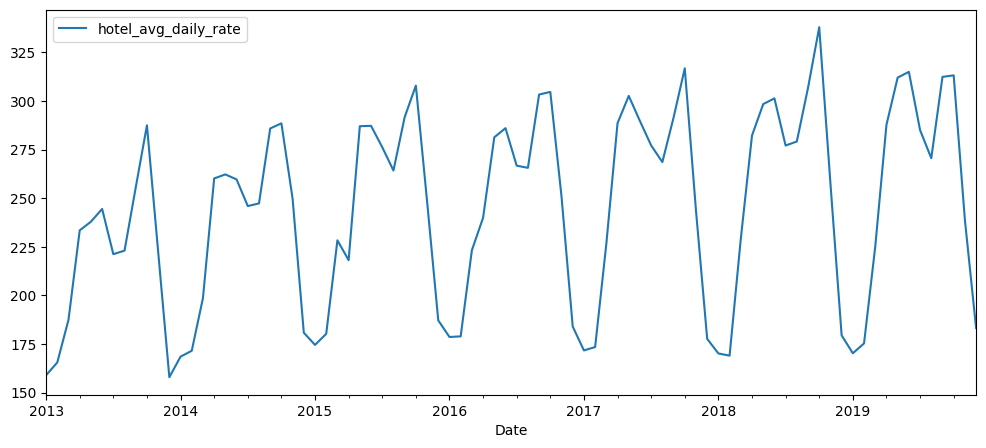

In [38]:
df['Date'] = pd.to_datetime(df['Date']) 
ax = df.plot(x='Date', y='hotel_avg_daily_rate', figsize=(12,5))
print(df.hotel_avg_daily_rate.min())
print(df.hotel_avg_daily_rate.max())

#### Above plot represent the seasonal trend.

# Decomposition

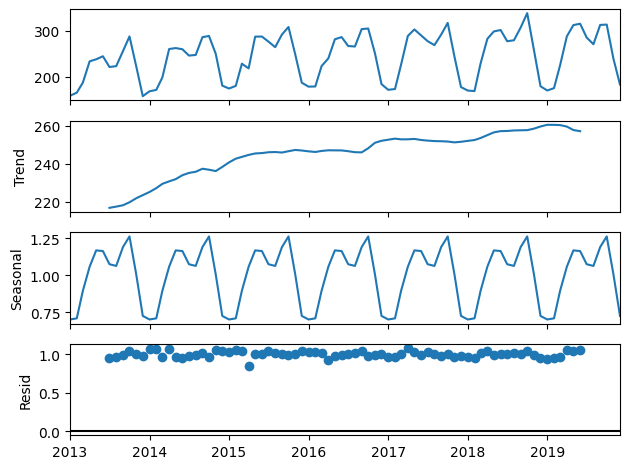

In [39]:
df.set_index('Date', inplace=True)
analysis = df[['hotel_avg_daily_rate']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

#### Above Decomposition made it is clear that our data is seasonal and trend is increasing.

# ADF Test
#### ADF testing will determind whether our dataset is stationary or not
#### We will check the presence of a unit root in the time series. If the null hypothesis is rejected, it indicates that the time series is stationary.

In [40]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
adf_test(df['hotel_avg_daily_rate'])

Results of Dickey-Fuller Test:
Test Statistic                 -3.597105
p-value                         0.005817
#Lags Used                     11.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


### ADF Statistic is smaller then any given critical value and p value is 0.005816620067413758 which is smaller than the significance level of 0.05. Clearly, we can reject the null hypothesis. So, the time series is, in fact,stationary.

#### Stationary represent that our series exibit the properties such as mean, variance, covariance, and standard deviation do not vary with time, or these stats properties are not a function of time

# ACF Plot
##### Tt measures the correlation of the time series with itself

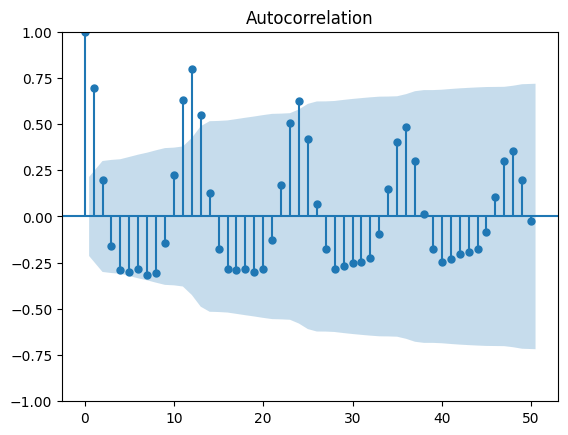

In [41]:
fig = plot_acf(df['hotel_avg_daily_rate'], lags=50)
plt.show()

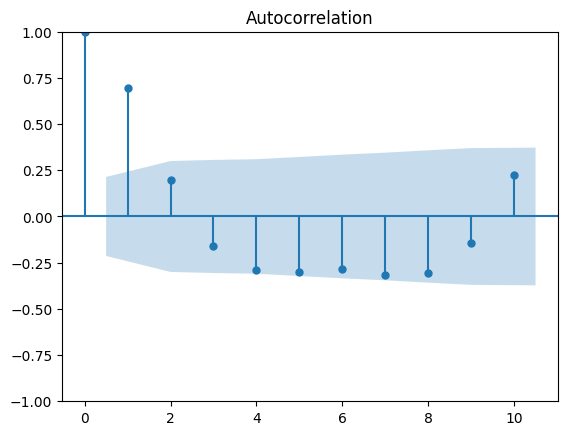

In [42]:
fig = plot_acf(df['hotel_avg_daily_rate'], lags=10)
plt.show()

#### From above ACF we can conclude that MA model is not appropiate because we are observing sinusoidal pattern, When we see a sinusoidal pattern in the ACF plot of a stationary process, this is a hint, that an autoregressive process is at play, and we must use an AR(p) model to produce our forecast. Also we can see for diminishing behaviour which makes our data perfect for AR model.

# PACF PLOT

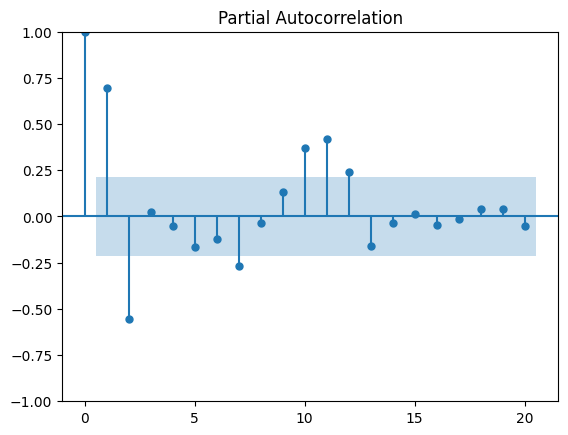

In [43]:
pacf_plot=plot_pacf(df.hotel_avg_daily_rate)

#### From above PACF plot we got few values of "p" like 1,2, 7, 10, 11, 12

# AR MODEL

#### Creating AR(1) model

In [44]:
df.index.freq = df.index.inferred_freq
model_ar = sm.tsa.arima.ARIMA(df['hotel_avg_daily_rate'], order = (1,0,0))
result_ar = model_ar.fit()
print(result_ar.summary())

                                SARIMAX Results                                 
Dep. Variable:     hotel_avg_daily_rate   No. Observations:                   84
Model:                   ARIMA(1, 0, 0)   Log Likelihood                -417.086
Date:                  Thu, 07 Dec 2023   AIC                            840.172
Time:                          23:57:32   BIC                            847.465
Sample:                      01-01-2013   HQIC                           843.104
                           - 12-01-2019                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        240.0019     13.354     17.972      0.000     213.828     266.176
ar.L1          0.7271      0.090      8.067      0.000       0.550       0.904
sigma2      1192.6043    248.411    

#### In above simple model both the constant and coofficient one period ago were significent as the p-value is zero. So we will test if complicated model will be best or not.

In [45]:
model_ar_2 = sm.tsa.arima.ARIMA(df['hotel_avg_daily_rate'], order = (2,0,0))
result_ar_2 = model_ar_2.fit()
print(result_ar_2.summary())

                                SARIMAX Results                                 
Dep. Variable:     hotel_avg_daily_rate   No. Observations:                   84
Model:                   ARIMA(2, 0, 0)   Log Likelihood                -398.043
Date:                  Thu, 07 Dec 2023   AIC                            804.086
Time:                          23:57:32   BIC                            813.809
Sample:                      01-01-2013   HQIC                           807.995
                           - 12-01-2019                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.6831      6.858     35.530      0.000     230.241     257.125
ar.L1          1.1637      0.112     10.355      0.000       0.943       1.384
ar.L2         -0.6169      0.108    

#### P value is still near to zero which means that lag 2 is also significent.

In [46]:
model_ar_3 = sm.tsa.arima.ARIMA(df['hotel_avg_daily_rate'], order = (3,0,0))
result_ar_3 = model_ar_3.fit()
print(result_ar_3.summary())

                                SARIMAX Results                                 
Dep. Variable:     hotel_avg_daily_rate   No. Observations:                   84
Model:                   ARIMA(3, 0, 0)   Log Likelihood                -397.930
Date:                  Thu, 07 Dec 2023   AIC                            805.859
Time:                          23:57:33   BIC                            818.013
Sample:                      01-01-2013   HQIC                           810.745
                           - 12-01-2019                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.5779      7.159     34.025      0.000     229.547     257.609
ar.L1          1.1953      0.122      9.766      0.000       0.955       1.435
ar.L2         -0.6775      0.159    

#### Here we can see that Lag 3 is not signifient as it is greater then 0.05. Also I can see that likley hood is increased which we prefer and low information criteria i.e. AIC BIC HQIC which is good. 
#### We willl check for LLR test to get the best value for of p for our AR model 

# LLR Test

In [47]:
def LLR_test(mod_1, mod_2, DF=1):
    L1=mod_1.fit().llf
    L2=mod_2.fit().llf
    LR=(2*(L2-L1))
    p=chi2.sf(LR, DF).round(3)
    return p

In [48]:
LLR_test(model_ar, model_ar_2)

0.0

In [49]:
LLR_test(model_ar_2, model_ar_3)

0.634

In [50]:
model_ar_4 = sm.tsa.arima.ARIMA(df['hotel_avg_daily_rate'], order = (4,0,0))
result_ar_4 = model_ar_4.fit()
print(result_ar_4.summary())
print("LLR test p-value: "+ str(LLR_test(model_ar_3, model_ar_4)))

                                SARIMAX Results                                 
Dep. Variable:     hotel_avg_daily_rate   No. Observations:                   84
Model:                   ARIMA(4, 0, 0)   Log Likelihood                -397.822
Date:                  Thu, 07 Dec 2023   AIC                            807.643
Time:                          23:57:33   BIC                            822.228
Sample:                      01-01-2013   HQIC                           813.506
                           - 12-01-2019                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.6788      7.061     34.512      0.000     229.840     257.517
ar.L1          1.1980      0.122      9.819      0.000       0.959       1.437
ar.L2         -0.7115      0.184    

In [51]:
model_ar_5 = sm.tsa.arima.ARIMA(df['hotel_avg_daily_rate'], order = (5,0,0))
result_ar_5 = model_ar_5.fit()
print(result_ar_5.summary())
print("LLR test p-value: "+ str(LLR_test(model_ar_4, model_ar_5)))

                                SARIMAX Results                                 
Dep. Variable:     hotel_avg_daily_rate   No. Observations:                   84
Model:                   ARIMA(5, 0, 0)   Log Likelihood                -396.710
Date:                  Thu, 07 Dec 2023   AIC                            807.420
Time:                          23:57:33   BIC                            824.436
Sample:                      01-01-2013   HQIC                           814.260
                           - 12-01-2019                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        244.1142      6.036     40.440      0.000     232.283     255.945
ar.L1          1.1867      0.122      9.704      0.000       0.947       1.426
ar.L2         -0.6921      0.187    

In [52]:
model_ar_6 = sm.tsa.arima.ARIMA(df['hotel_avg_daily_rate'], order = (6,0,0))
result_ar_6 = model_ar_6.fit()
print(result_ar_6.summary())
print("LLR test p-value: "+ str(LLR_test(model_ar_5, model_ar_6)))

                                SARIMAX Results                                 
Dep. Variable:     hotel_avg_daily_rate   No. Observations:                   84
Model:                   ARIMA(6, 0, 0)   Log Likelihood                -394.962
Date:                  Thu, 07 Dec 2023   AIC                            805.925
Time:                          23:57:34   BIC                            825.371
Sample:                      01-01-2013   HQIC                           813.742
                           - 12-01-2019                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        244.4034      4.886     50.022      0.000     234.827     253.980
ar.L1          1.1529      0.120      9.606      0.000       0.918       1.388
ar.L2         -0.6592      0.184    

In [53]:
model_ar_7 = sm.tsa.arima.ARIMA(df['hotel_avg_daily_rate'], order = (7,0,0))
result_ar_7 = model_ar_7.fit()
print(result_ar_7.summary())
print("LLR test p-value: "+ str(LLR_test(model_ar_6, model_ar_7)))

                                SARIMAX Results                                 
Dep. Variable:     hotel_avg_daily_rate   No. Observations:                   84
Model:                   ARIMA(7, 0, 0)   Log Likelihood                -391.069
Date:                  Thu, 07 Dec 2023   AIC                            800.138
Time:                          23:57:34   BIC                            822.015
Sample:                      01-01-2013   HQIC                           808.932
                           - 12-01-2019                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        244.5892      3.437     71.154      0.000     237.852     251.327
ar.L1          1.0803      0.110      9.853      0.000       0.865       1.295
ar.L2         -0.6214      0.180    

In [54]:
model_ar_8 = sm.tsa.arima.ARIMA(df['hotel_avg_daily_rate'], order = (8,0,0))
result_ar_8 = model_ar_8.fit()
print(result_ar_8.summary())
print("LLR test p-value: "+ str(LLR_test(model_ar_7, model_ar_8)))

                                SARIMAX Results                                 
Dep. Variable:     hotel_avg_daily_rate   No. Observations:                   84
Model:                   ARIMA(8, 0, 0)   Log Likelihood                -390.957
Date:                  Thu, 07 Dec 2023   AIC                            801.913
Time:                          23:57:35   BIC                            826.221
Sample:                      01-01-2013   HQIC                           811.685
                           - 12-01-2019                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        244.6156      3.307     73.969      0.000     238.134     251.097
ar.L1          1.0626      0.116      9.133      0.000       0.835       1.291
ar.L2         -0.6137      0.179    

In [55]:
model_ar_9 = sm.tsa.arima.ARIMA(df['hotel_avg_daily_rate'], order = (9,0,0))
result_ar_9 = model_ar_9.fit()
print(result_ar_9.summary())
print("LLR test p-value: "+ str(LLR_test(model_ar_8, model_ar_9)))

                                SARIMAX Results                                 
Dep. Variable:     hotel_avg_daily_rate   No. Observations:                   84
Model:                   ARIMA(9, 0, 0)   Log Likelihood                -390.506
Date:                  Thu, 07 Dec 2023   AIC                            803.013
Time:                          23:57:35   BIC                            829.752
Sample:                      01-01-2013   HQIC                           813.762
                           - 12-01-2019                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        244.4711      4.146     58.962      0.000     236.345     252.597
ar.L1          1.0695      0.120      8.875      0.000       0.833       1.306
ar.L2         -0.5864      0.206    

In [56]:
model_ar_10 = sm.tsa.arima.ARIMA(df['hotel_avg_daily_rate'], order = (10,0,0))
result_ar_10 = model_ar_10.fit()
print(result_ar_10.summary())
print("LLR test p-value: "+ str(LLR_test(model_ar_9, model_ar_10)))

C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                SARIMAX Results                                 
Dep. Variable:     hotel_avg_daily_rate   No. Observations:                   84
Model:                  ARIMA(10, 0, 0)   Log Likelihood                -380.470
Date:                  Thu, 07 Dec 2023   AIC                            784.941
Time:                          23:57:36   BIC                            814.111
Sample:                      01-01-2013   HQIC                           796.667
                           - 12-01-2019                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.9930      7.457     32.719      0.000     229.377     258.609
ar.L1          1.0151      0.114      8.884      0.000       0.791       1.239
ar.L2         -0.4997      0.207    

C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [57]:
model_ar_11 = sm.tsa.arima.ARIMA(df['hotel_avg_daily_rate'], order = (11,0,0))
result_ar_11 = model_ar_11.fit()
print(result_ar_11.summary())
print("LLR test p-value: "+ str(LLR_test(model_ar_10, model_ar_11)))

C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                SARIMAX Results                                 
Dep. Variable:     hotel_avg_daily_rate   No. Observations:                   84
Model:                  ARIMA(11, 0, 0)   Log Likelihood                -361.455
Date:                  Thu, 07 Dec 2023   AIC                            748.911
Time:                          23:57:37   BIC                            780.511
Sample:                      01-01-2013   HQIC                           761.614
                           - 12-01-2019                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        244.3711     20.727     11.790      0.000     203.747     284.995
ar.L1          0.7169      0.113      6.325      0.000       0.495       0.939
ar.L2         -0.2537      0.152    

C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


LLR test p-value: 0.0


C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### From above model I found that 11th fitting is best because LLR test p-value is equal to p-value at L 11 with maximum Log Likelihood of -361.455

In [58]:
print("LLR test: "+ str(LLR_test(model_ar, model_ar_11, DF=10)))

C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


LLR test: 0.0


C:\Users\saura\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### As expected LLR test is coming zero so our model can be best fir at 11, 12

# Representation of AR Model

Mean Absolute Error 9.070841766441994
predicted=181.596546, expected=179.400000
predicted=155.760302, expected=170.220000
predicted=164.633375, expected=175.290000
predicted=223.276962, expected=225.100000
predicted=283.494022, expected=287.720000
predicted=305.864424, expected=312.010000
predicted=302.325155, expected=314.970000
predicted=279.699210, expected=285.020000
predicted=283.492716, expected=270.540000
predicted=316.591831, expected=312.370000
predicted=332.389502, expected=313.170000
predicted=261.973556, expected=238.820000
predicted=182.299757, expected=183.200000


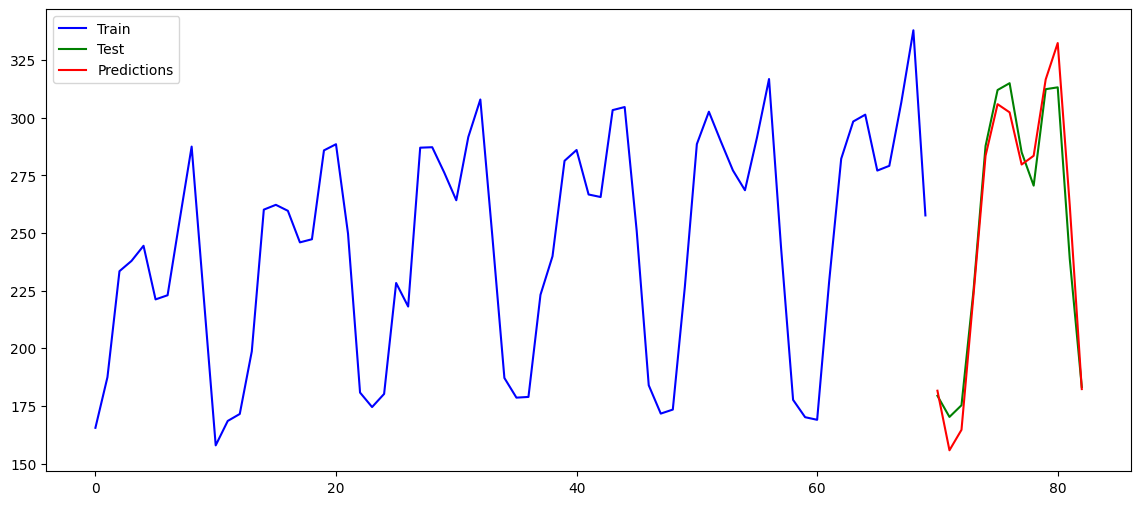

In [59]:
X = df['hotel_avg_daily_rate'].values
train, test = X[1:len(X)-13], X[len(X)-13:]
model = AutoReg(train, lags=12)
model_fit = model.fit()
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
mse = mean_absolute_error(test, predictions)   
print("Mean Absolute Error",mse)
for i in range(len(predictions)):
 print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_absolute_error(test, predictions))
pyplot.figure(figsize=(14, 6))
pyplot.plot(range(len(train)), train, color='blue', label='Train')
pyplot.plot(range(len(train), len(train) + len(test)), test, color='green', label='Test')
pyplot.plot(range(len(train), len(train) + len(test)), predictions, color='red', label='Predictions')
pyplot.legend()
pyplot.show()

# Forcasting next 6 months 

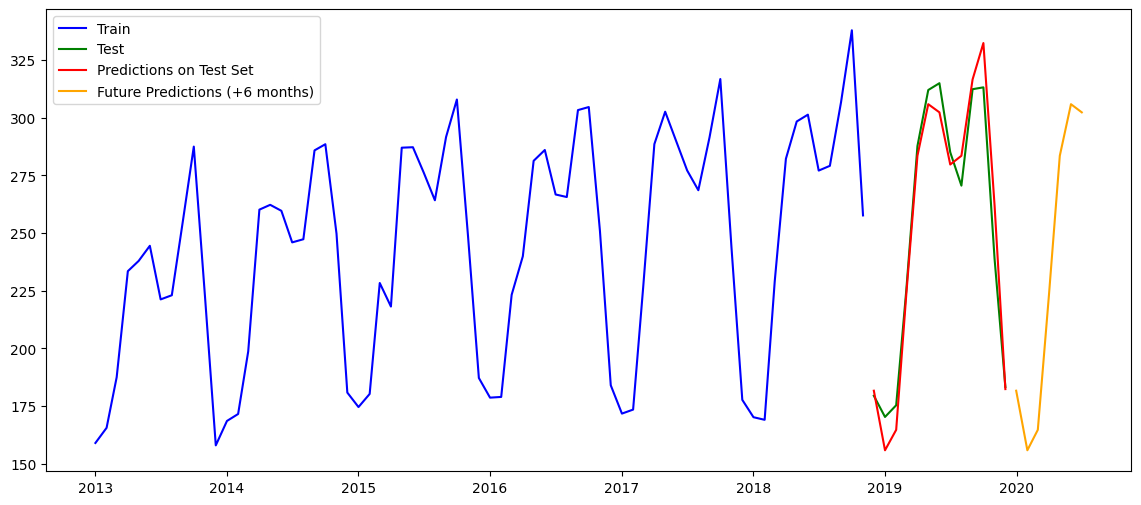

In [61]:
from pandas import date_range
forecast_steps = 6
X = df['hotel_avg_daily_rate'].values
train, test = X[:len(X)-13], X[len(X)-13:]
model = AutoReg(train, lags=12)
model_fit = model.fit()
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
future_dates = date_range(start=df.index[-1], periods=forecast_steps + 1, freq='M')
future_predictions = model_fit.predict(start=len(train), end=len(train) + forecast_steps, dynamic=False)
pyplot.figure(figsize=(14, 6))
pyplot.plot(df.index[:-13], train, color='blue', label='Train')
pyplot.plot(df.index[-13:], test, color='green', label='Test')
pyplot.plot(df.index[-13:], predictions, color='red', label='Predictions on Test Set')
pyplot.plot(future_dates, future_predictions, color='orange', label=f'Future Predictions (+{forecast_steps} months)')
pyplot.legend()
pyplot.show()

In [62]:
future_predictions

array([181.59624614, 155.7633496 , 164.63291925, 223.27538312,
       283.49203439, 305.86280524, 302.32382005])